# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [26]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable
import scipy.stats as stats
import seaborn as sns

In [27]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [28]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

/Users/mikeli888/miniconda3/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


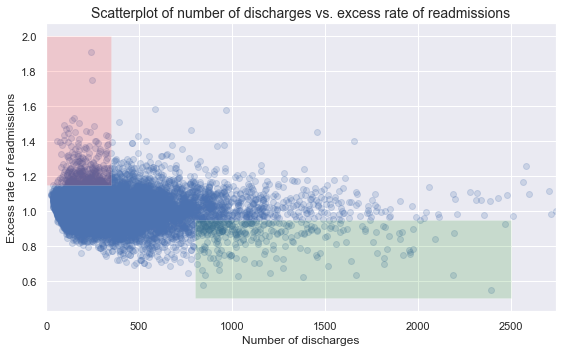

In [29]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [30]:
# Your turn

## Question A (My view on above analysis and recommendations)

I do not agree with the above analysis.

### Issues with Analysis: 
1) The analysis uses number of discharges to determine hospital capacity, it is not accurate measure<BR>
2) It uses the column "Excess Readmission Ratio" in analysis but it did not filter out the null values (over 3000 records as shown below) as it did with Number of Discharges.<BR>
3) The analysis should evalute the statistical significance of the data based on certain significance level (eg 0.05) <BR>


In [31]:
# 8/30/18:
# Conclusion: The analysis is that small facilities resulted in below-par services => more readmissions

hospital_read_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 12 columns):
Hospital Name                 16860 non-null object
Provider Number               16860 non-null int64
State                         16860 non-null object
Measure Name                  16860 non-null object
Number of Discharges          16860 non-null object
Footnote                      3129 non-null float64
Excess Readmission Ratio      13731 non-null float64
Predicted Readmission Rate    13731 non-null float64
Expected Readmission Rate     13731 non-null float64
Number of Readmissions        11497 non-null float64
Start Date                    16860 non-null object
End Date                      16860 non-null object
dtypes: float64(5), int64(1), object(6)
memory usage: 1.5+ MB


## Question B (Support for my arguments and my own recommendations)

### 1) Setup an appropriate hypothesis test. 
H0: There is no correlation between number of discharges and readmission rates<BR>
Ha: There is correlation between number of discharges and readmission rates<BR>

### 2) Compute and report the observed significance value (or p-value)
Based on below Pearson correlation coefficient value, we can see Number of Discharges does have a negative correlation with Excess Readmission Ratio. Also as p-value is very small, we can reject the null hypothesis and accept the alternative hypothesis that there is correlation between number of discharges and readmission rates

In [32]:
# 1) Further clean the data by removing records with null readmission rates
final_hospital_read_df = clean_hospital_read_df[np.isfinite(clean_hospital_read_df['Excess Readmission Ratio'])]
print('final count, orig count: ', final_hospital_read_df.size, clean_hospital_read_df.size)

pcorr, pvalue = stats.pearsonr(final_hospital_read_df['Number of Discharges'], final_hospital_read_df['Excess Readmission Ratio'])
print('correlation, pvalue: ', pcorr, pvalue)

final count, orig count:  137964 138936
correlation, pvalue:  -0.09739794351079353 1.222547377680967e-25


### 3) Report statistical significance for  αα  = .01.
The p-value of 1.222e-25 is still smaller than 0.01 and thus same statistical significance as 0.05 level. 

### 4) Discuss statistical significance and practical significance.
As the Pearson correlation coefficient is very close to 0, it indicates a very weak correlation between the two values. Moreover, we have filtered out a portion of the data during Preliminary Analysis due to missing values in Excess Readmission Ratio and Number of Discharges. This also weakens the significance of this analysis.  

Given the very weak correlation and above issue with missing values, the practical significance is not strong enough to warrant the policy recommendations the author proposed. My recommendation is to gather/reconcile the missing values from the original data and to re-run the analysis after we have a complete data set.

### 5) scatterplot above: What are the advantages and disadvantages of using this plot to convey information
The good things about scatterplot is to show large quantities of data visually and to locate the clustering of data. However it does not convey the strength of the correlation and a clear trend line.

Below is a joint plot that conveys same information but with the Pearson correlation coefficient, the p-value and the trend line to cleary convey the correlation between the two attributes.

/Users/mikeli888/miniconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


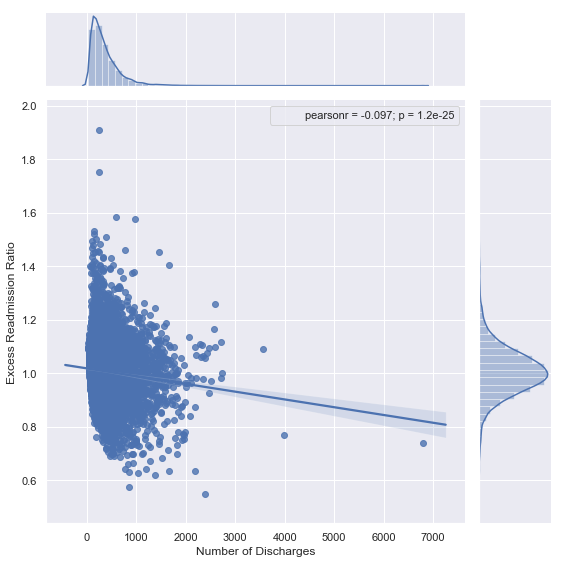

In [33]:
# 8/31/18: Jointplot supposed to show Pearson and p values by default but that feature was removed.
sns.set(style="darkgrid", color_codes=True)
j = sns.jointplot('Number of Discharges', 'Excess Readmission Ratio', data = final_hospital_read_df, kind='reg', height=8)
j.annotate(stats.pearsonr)
plt.show()